In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import seaborn.apionly as sns
import pandas as pd
import pcmdpy as ppy
%matplotlib inline

GPU acceleration enabled


In [2]:
try:
    ppy.gpu_utils.initialize_gpu(n=0)
    GPU_AVAIL = True
except:
    GPU_AVAIL = False

using given n: 0
Starting SourceModule Code
Past the SourceModule code
CUDAC Available


In [3]:
f = ppy.instrument.default_m31_filters()
try:
    iso_model
except NameError:
    iso_model = ppy.isochrones.Isochrone_Model(f)
driv = ppy.driver.Driver(iso_model, gpu=GPU_AVAIL)

In [4]:
tau_params = np.array([0., -1., 4., 100.])
tau = ppy.galaxy.DefaultTau(tau_params)

In [5]:
logSFH_base = np.log10(tau.sfh_model.as_default().SFH)

(Text(0,0.5,'SFH'), None)

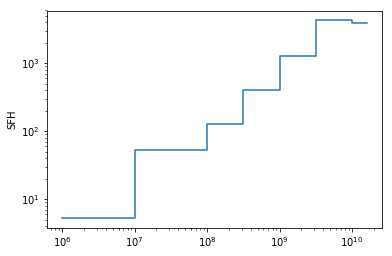

In [6]:
age_edges = 10.**(np.array([6., 7., 8., 8.5, 9., 9.5, 10., 10.2]))

ages = np.repeat(age_edges, 2)[1:-1]
y = 10.**(logSFH_base)
y = np.repeat(y, 2)
dt = np.diff(age_edges)
plt.plot(ages, y)
plt.xscale('log')
plt.ylabel('SFH'), plt.yscale('log')

In [7]:
base_params = np.append(tau_params[:2], logSFH_base)
base = ppy.galaxy.DefaultNonParam(base_params)

In [8]:
def alter_model(index, dex_shift):
    new_params = np.copy(base_params)
    new_params[index] += dex_shift
    return ppy.galaxy.DefaultNonParam(new_params)

In [9]:
%%time
pcmd_base, _ = driv.simulate(base, 1024, fixed_seed=True, downsample=5)

CPU times: user 1.84 s, sys: 461 ms, total: 2.3 s
Wall time: 2.74 s


In [10]:
ssp = ppy.galaxy.DefaultSSP(np.array([0., -2., 1., 10.]))

((30, 22), (-1.0, 4.0))

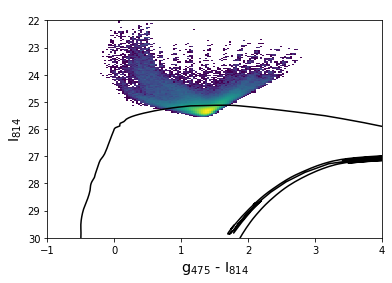

In [11]:
fig, ax = plt.subplots()
ppy.plotting.plot_pcmd(pcmd_base, ax=ax)
ppy.plotting.plot_isochrone(ssp, iso_model, axes=ax)
ax.set_ylim([30, 22]), ax.set_xlim([-1., 4.])

In [12]:
def compare_model(pcmd_base, gal_model, ax=None, N_im=1024, bins=40., title='', **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    pcmd_new, _ = driv.simulate(gal_model, N_im, fixed_seed=True, downsample=5)
    ax, chi, bins, norm = ppy.plotting.plot_pcmd_residual(pcmd_new, pcmd_base, ax=ax, bins=bins)
    chi2 = np.sum(chi**2)
    ppy.plotting.plot_isochrone(ssp, iso_model, axes=ax)
    title += r' $\chi^2$ = ' + '{:.1e}'.format(chi2)
    ax.set_title(title)
    plt.colorbar(label=r'$\chi$', ax=ax)
    ax.set_ylim([bins[1][-1], bins[1][0]])
    ax.set_xlim([bins[0][0], bins[0][-1]])
    return ax

In [13]:
bins = [np.arange(-1, 4, 0.05), np.arange(20, 28, 0.05)]

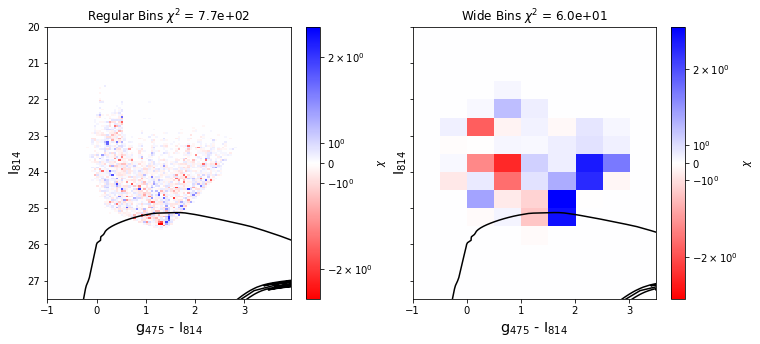

In [14]:
fix, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 5))
compare_model(pcmd_base, base, title='Regular Bins', bins=bins, ax=axes[0])
bins_ = [np.arange(-1, 4, 0.5), np.arange(20, 28, 0.5)]
compare_model(pcmd_base, base, title='Wide Bins', bins=bins_, ax=axes[1])

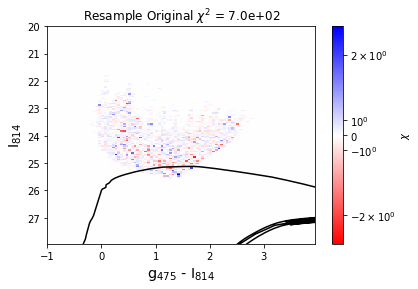

In [15]:
compare_model(pcmd_base, base, title='Resample Original', bins=bins)
plt.savefig('figures/variations_default.pdf')

In [17]:
param_names = ['[Fe/H]', 'E(B-V)', '1Myr - 10Myr', '10Myr - 100Myr', '100Myr - 300Myr', '300Myr - 1Gyr',
               '1Gyr - 3 Gyr', '3Gyr - 10Gyr', '10Gyr - 16Gyr']

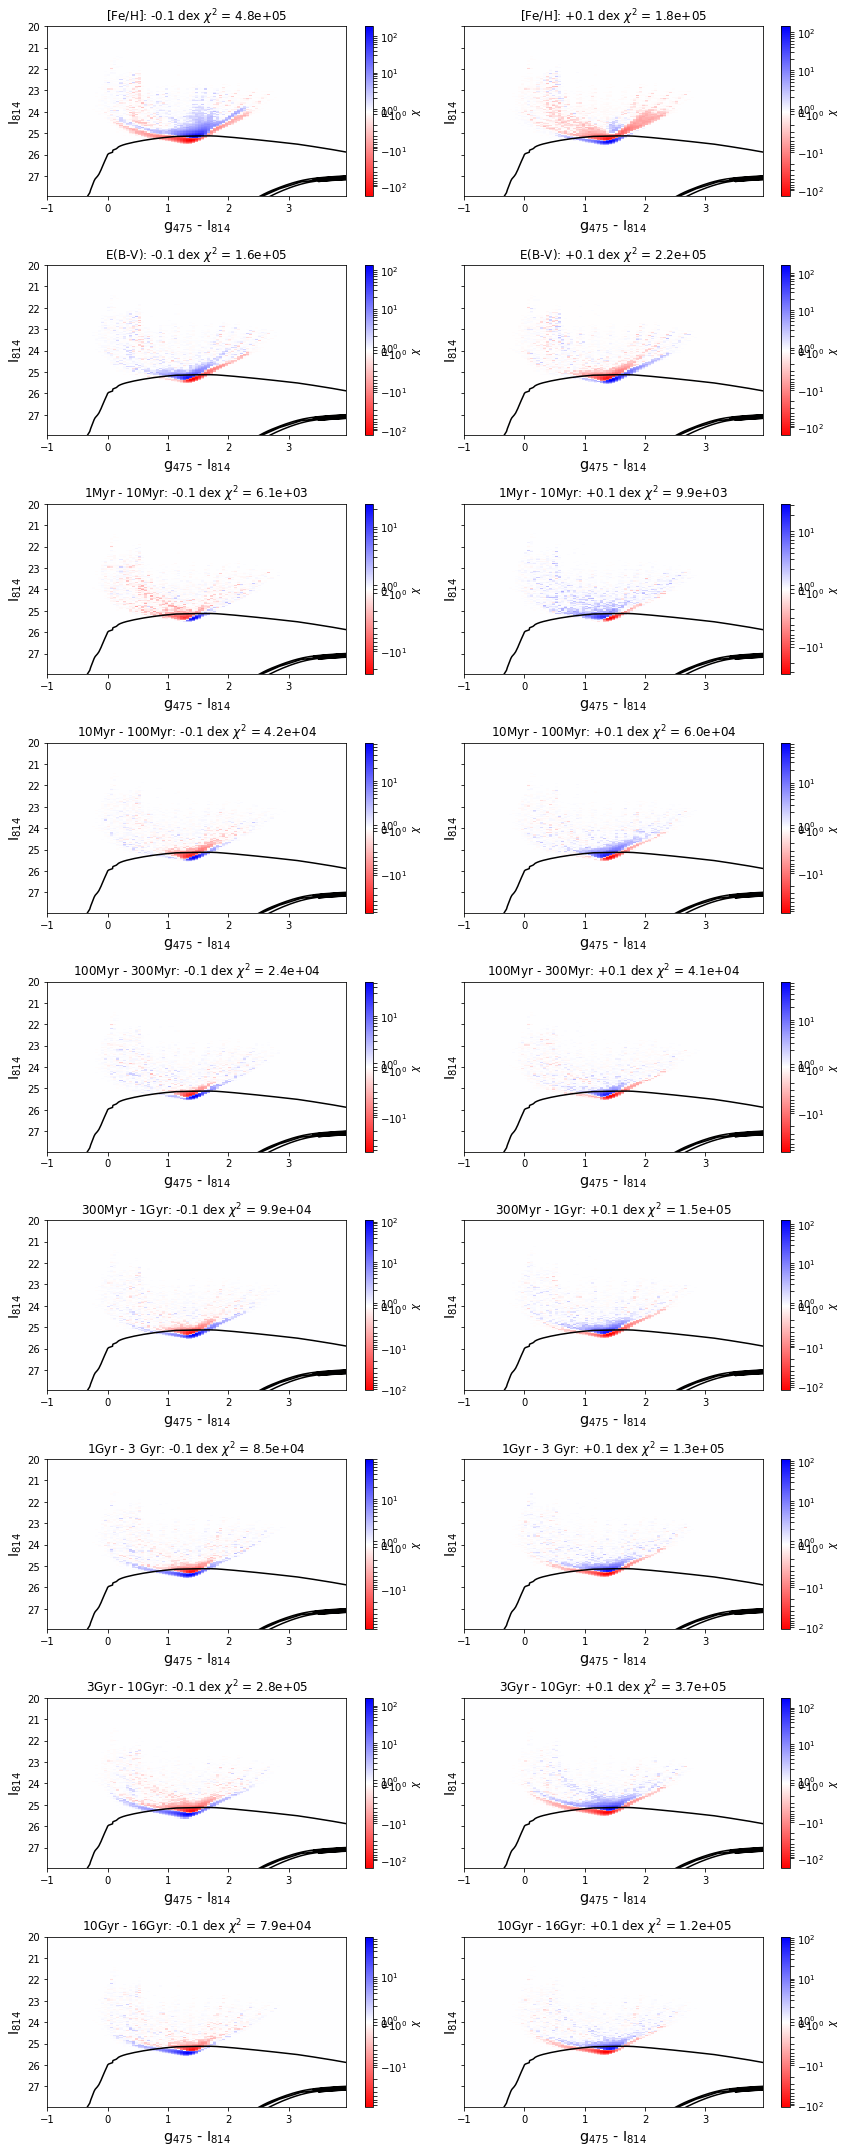

In [18]:
dp = 0.1
fix, axes = plt.subplots(ncols=2, nrows=9, sharey=True, figsize=(12, 30))
for i in range(9):
    new_gal = alter_model(i, -dp)
    title = param_names[i] + ': -{:.1f} dex'.format(dp)
    compare_model(pcmd_base, new_gal, title=title, bins=bins, ax=axes[i,0])
    new_gal = alter_model(i, dp)
    title = param_names[i] + ': +{:.1f} dex'.format(dp)
    compare_model(pcmd_base, new_gal, title=title, bins=bins, ax=axes[i,1])
plt.tight_layout()
plt.savefig('figures/variations_10.pdf')

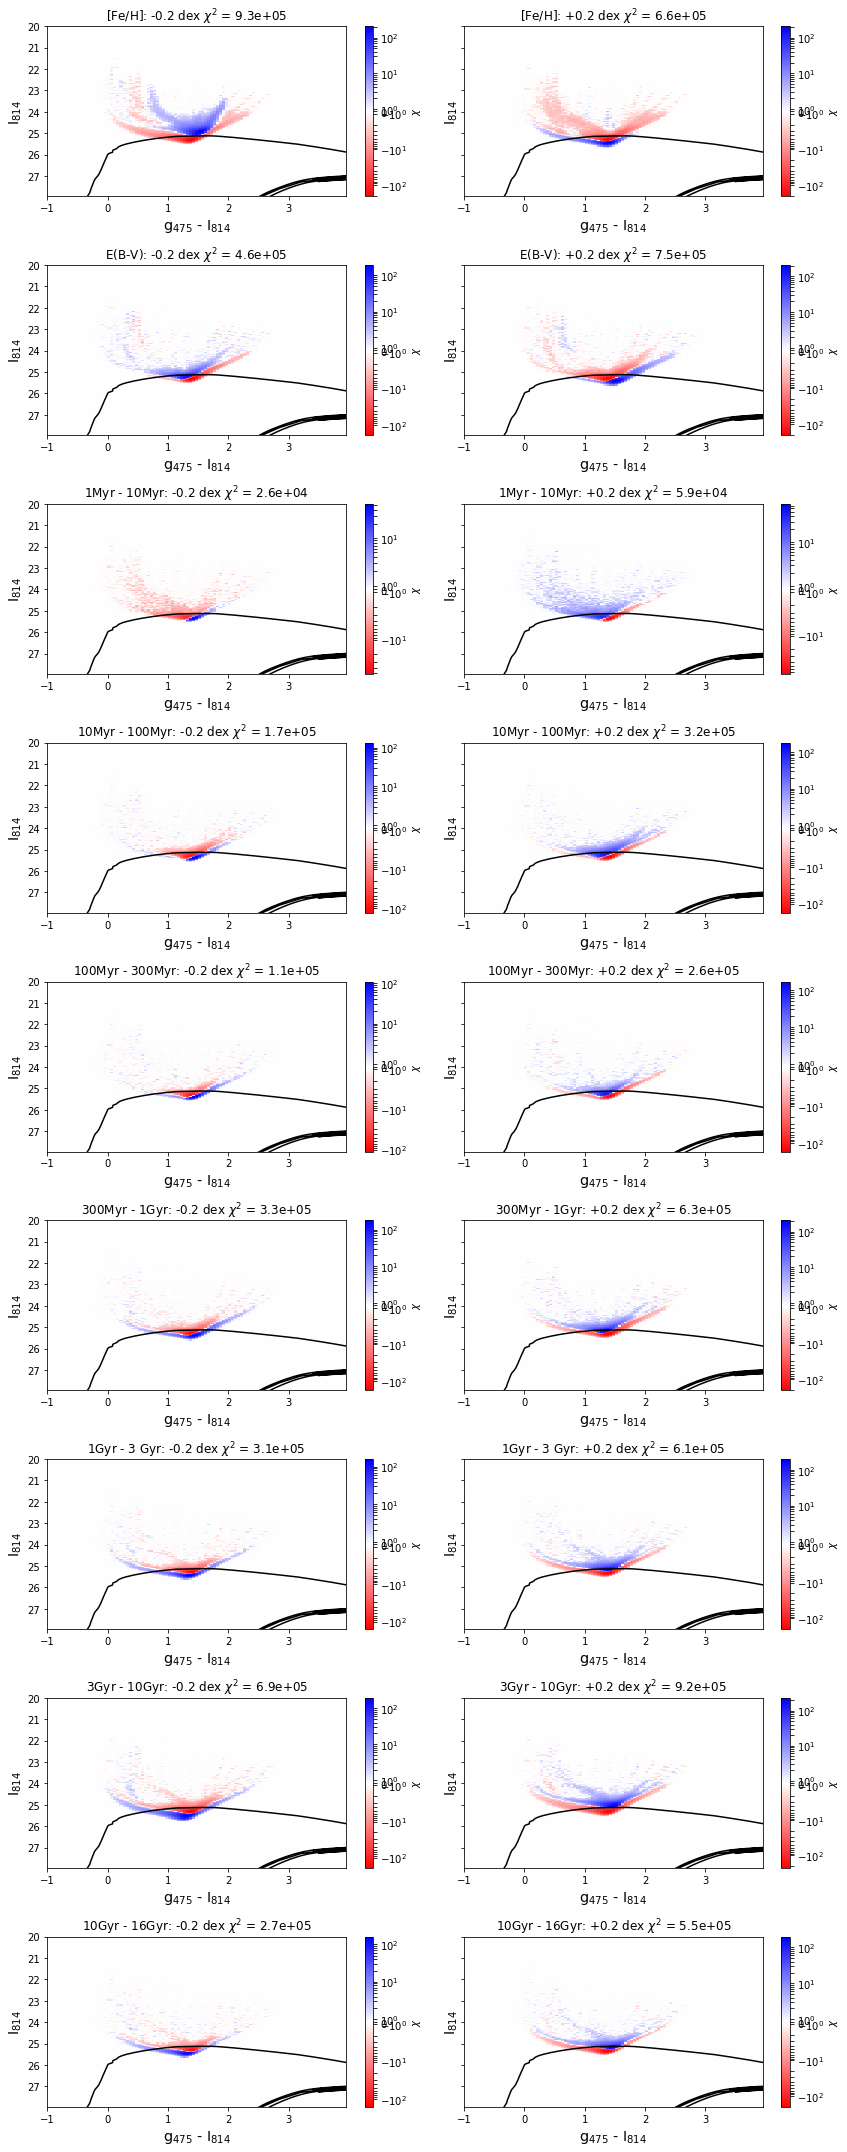

In [19]:
dp = 0.25
fix, axes = plt.subplots(ncols=2, nrows=9, sharey=True, figsize=(12, 30))
for i in range(9):
    new_gal = alter_model(i, -dp)
    title = param_names[i] + ': -{:.1f} dex'.format(dp)
    compare_model(pcmd_base, new_gal, title=title, bins=bins, ax=axes[i,0])
    new_gal = alter_model(i, dp)
    title = param_names[i] + ': +{:.1f} dex'.format(dp)
    compare_model(pcmd_base, new_gal, title=title, bins=bins, ax=axes[i,1])
plt.tight_layout()
plt.savefig('figures/variations_25.pdf')

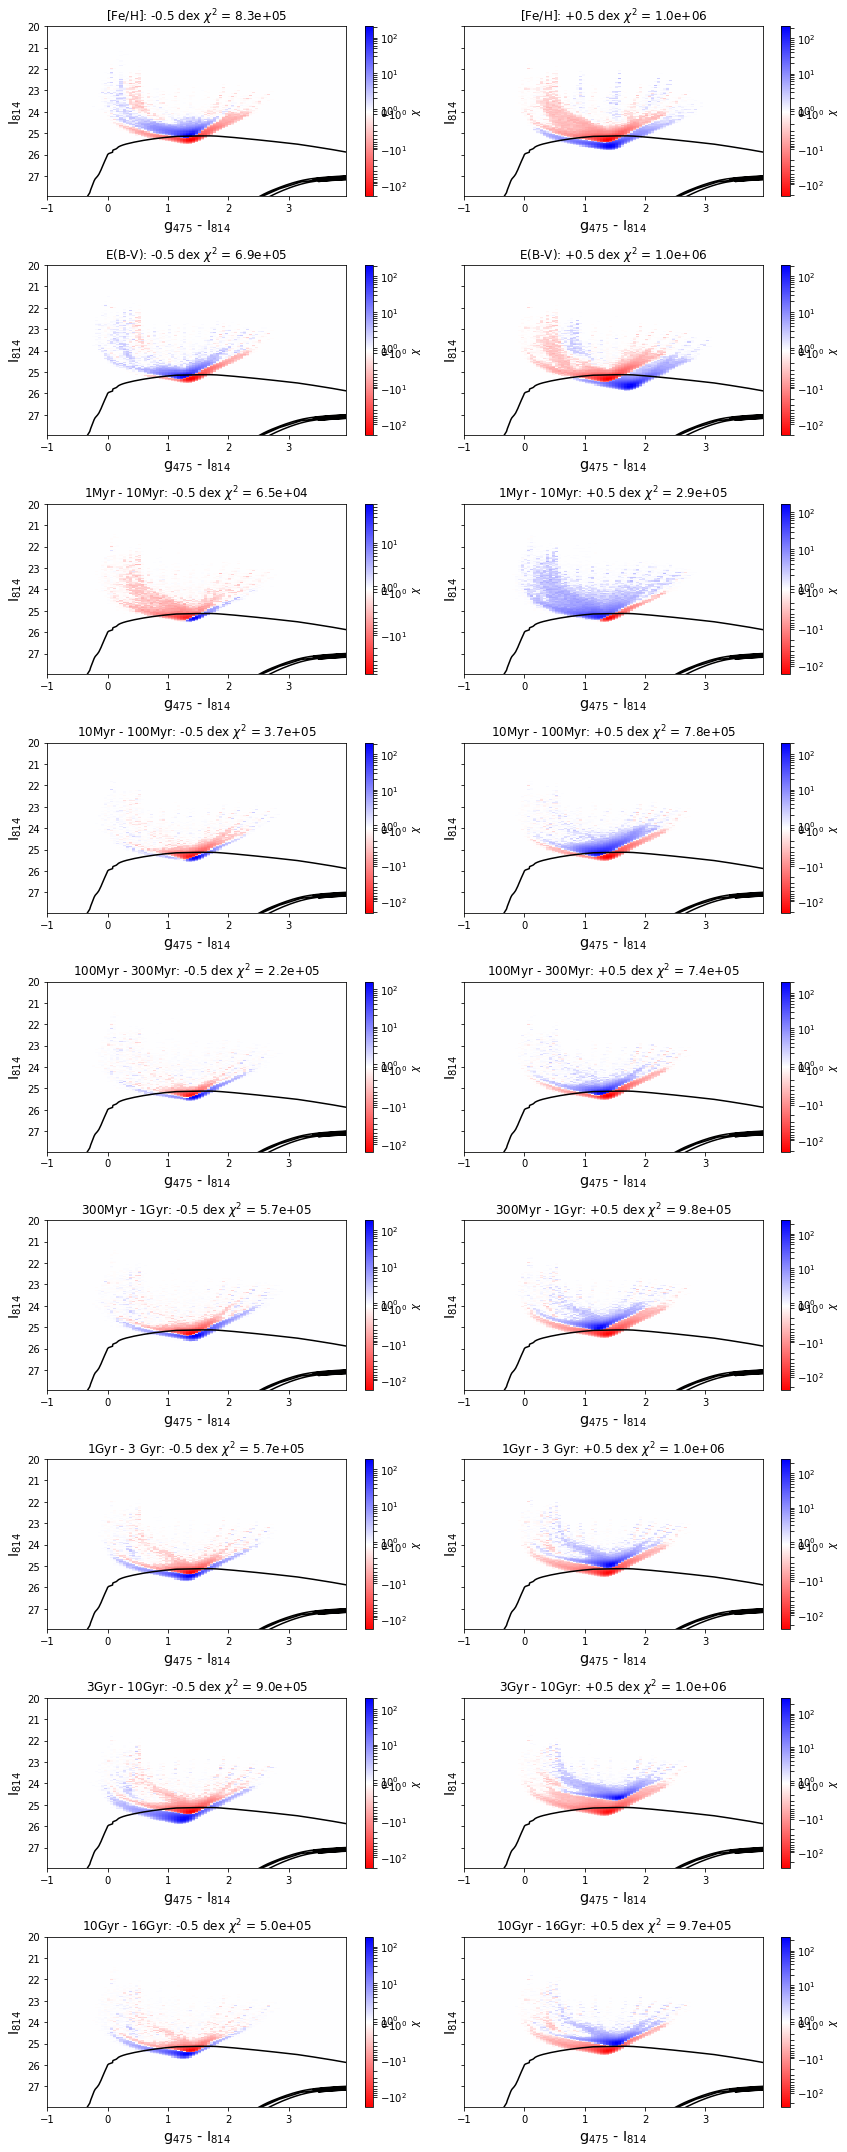

In [20]:
dp = 0.5
fix, axes = plt.subplots(ncols=2, nrows=9, sharey=True, figsize=(12, 30))
for i in range(9):
    new_gal = alter_model(i, -dp)
    title = param_names[i] + ': -{:.1f} dex'.format(dp)
    compare_model(pcmd_base, new_gal, title=title, bins=bins, ax=axes[i,0])
    new_gal = alter_model(i, dp)
    title = param_names[i] + ': +{:.1f} dex'.format(dp)
    compare_model(pcmd_base, new_gal, title=title, bins=bins, ax=axes[i,1])
plt.tight_layout()
plt.savefig('figures/variations_50.pdf')